Tutorial for making lightcurves with lightkurve from http://lightkurve.keplerscience.org/tutorials/2.09-how-to-use-lightkurve-for-asteroseismology.html

In [61]:
import scipy
import pandas

In [5]:
from lightkurve import KeplerTargetPixelFile
import matplotlib.pyplot as plt
import numpy as np
from lightkurve import log

KelperTargetPixelFile is where the pixel files are stored from Kepler. The ID is the Kepler ID number (which also include K2). Learn more here: http://lightkurve.keplerscience.org/tutorials/1.02-target-pixel-files.html

Get the star that Aaron was using in his thesis, to get the raw flux

In [20]:
tpf = KeplerTargetPixelFile.from_archive("Kepler-91", quarter=4)

If you want to look up the documentation for one of the itmes then do it like in R

In [21]:
?tpf.astropy_time

In [12]:
tpf.cadenceno

array([11914, 11915, 11917, ..., 16308, 16309, 16310], dtype=int32)

In [32]:
?tpf.cadenceno

Flux and time values give the lightcurve. The flux is summed from the pixel file, according to some aperature. Use the default aperature to start

In [34]:
tpf.obsmode

'long cadence'

In [23]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

The % sign is a magic card that is used in juypter notebooks. Doing %matplotlib notebook will make an interactive plot, and also makes it so you don't have to do plot.show. 
You can also do %matplotlib inline to make the plots show up without doing plot.show, but the plots will then be static.

<IPython.core.display.Javascript object>


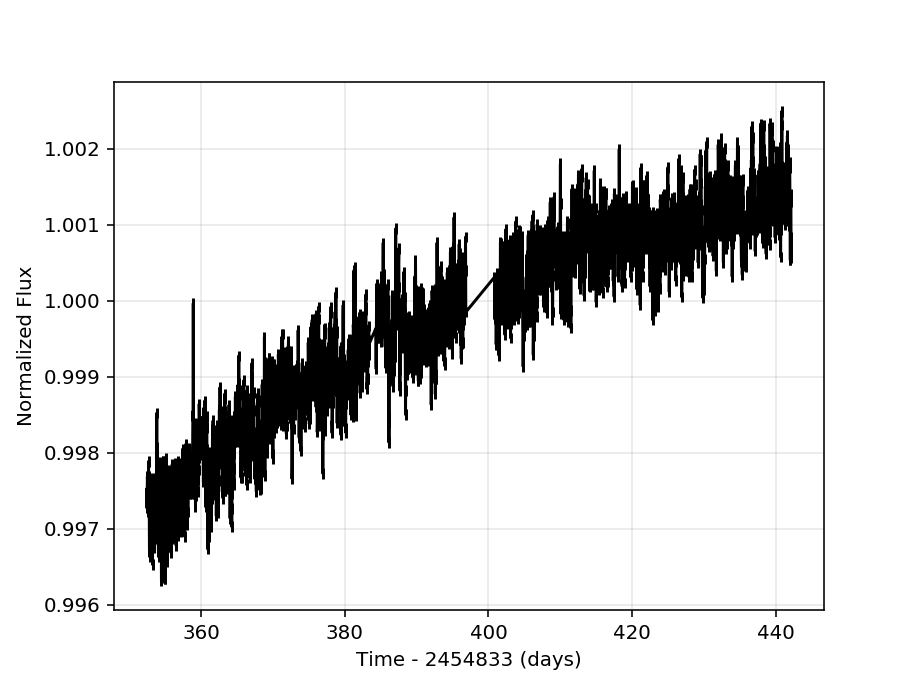

In [56]:
%matplotlib notebook
lc.plot()

Now flatten the light curve to get rid of the trend, using flatten

What's the difference between adjacent time points?

In [58]:
diffs = np.diff(lc.time)

In [66]:
np.percentile(diffs, [5, 25, 50, 75, 95])

array([ 0.02043314,  0.0204334 ,  0.02043375,  0.02043407,  0.02043427])

In [67]:
max(diffs)

3.9845866365722031

In [68]:
min(diffs)

0.020433007324754726

<IPython.core.display.Javascript object>


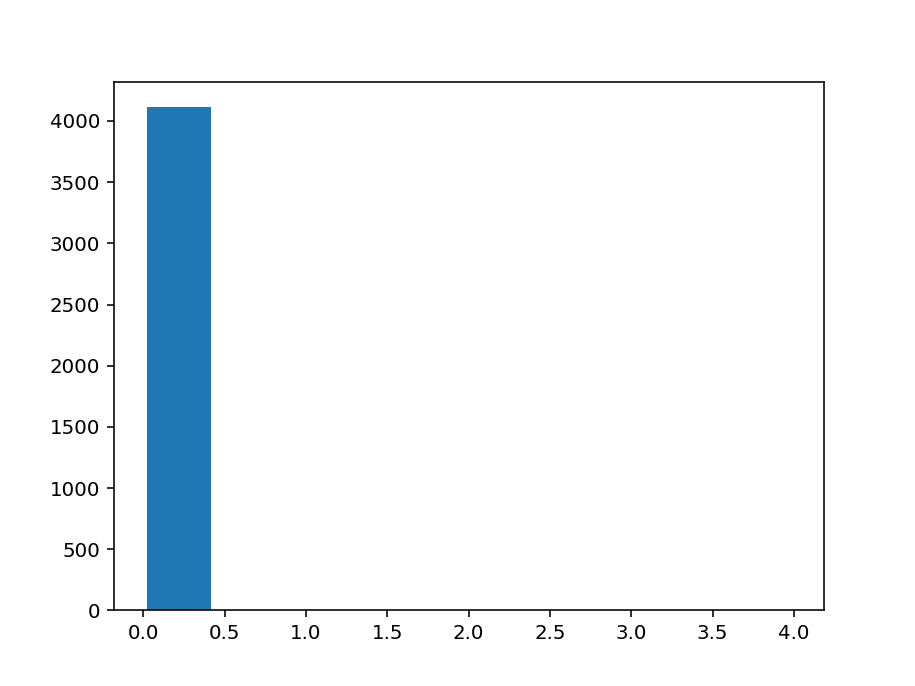

In [60]:
plt.figure()
plt.hist(diffs)
plt.show()

In [77]:
flat_lc = lc.flatten(polyorder=3, window_length=201)

<IPython.core.display.Javascript object>


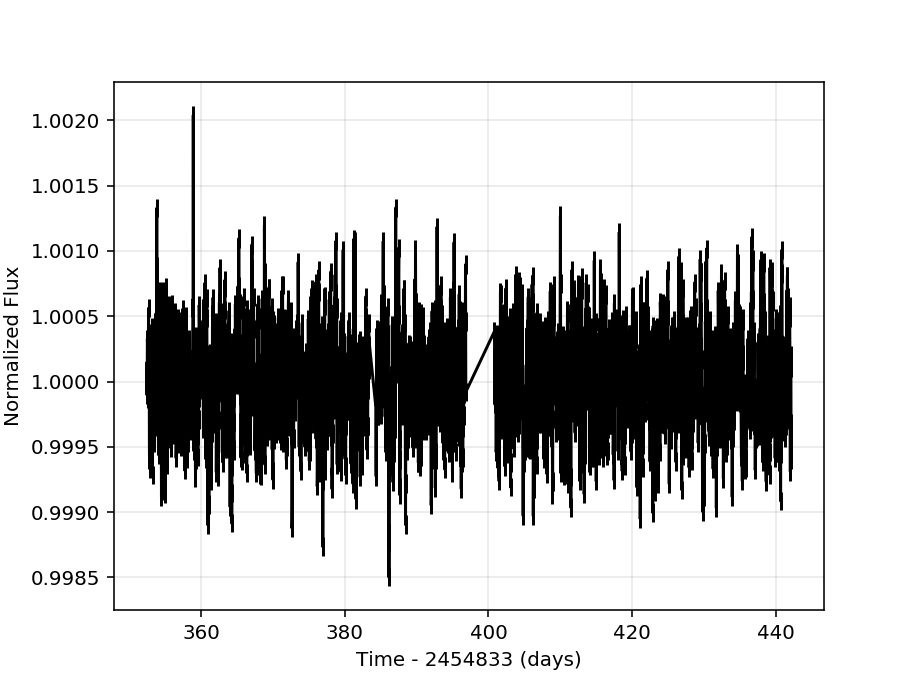

In [78]:
flat_lc.plot()

In [31]:
?scipy.signal.savgol_filter